In [72]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

: 

In [59]:
df = pd.read_csv('realheart.csv')

In [60]:
df.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.729373,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.934189,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [61]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [62]:
X = df.drop(columns='target')
y = df['target']

In [63]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state= 42)

In [64]:
X_train.shape

(227, 13)

In [65]:
X_test.shape

(76, 13)

In [117]:
model = Sequential([
    Dense(64, activation='relu', input_dim = 13),
    Dense(64, activation='relu'),
    Dense(32, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

callback = EarlyStopping(
    monitor ='val_accuracy',
    patience = 15
)

history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 26,
                    callbacks = [callback])

/home/taseermehboob/tensorflow_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4535 - loss: 15.5563 - val_accuracy: 0.4868 - val_loss: 2.9923
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4391 - loss: 2.2973 - val_accuracy: 0.4868 - val_loss: 1.4407
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4957 - loss: 1.3463 - val_accuracy: 0.4868 - val_loss: 1.2609
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4830 - loss: 1.0519 - val_accuracy: 0.5263 - val_loss: 0.6697
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5392 - loss: 0.7157 - val_accuracy: 0.5132 - val_loss: 0.7835
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5669 - loss: 0.7120 - val_accuracy: 0.6579 - val_loss: 0.6688
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5947 - loss: 0.7214 - val_accuracy: 0.6316 - val_loss: 0.5920
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7158 - loss: 0.5971 - val_accuracy: 0.6842 - val_loss: 0.6

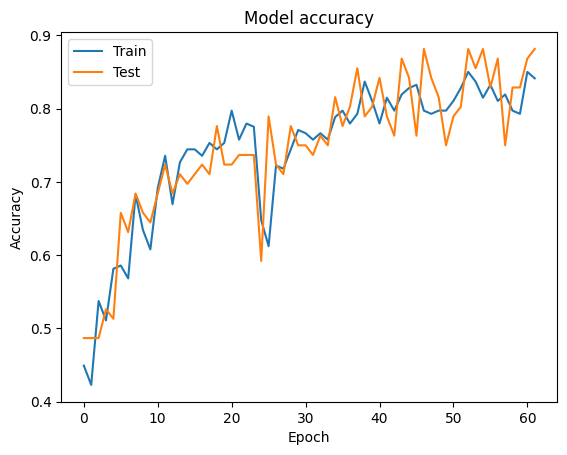

In [118]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

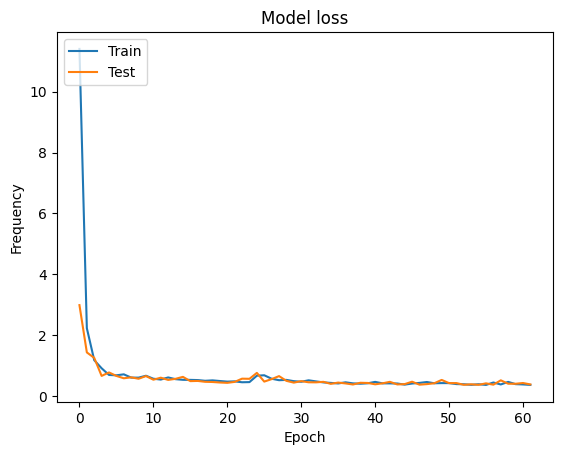

In [119]:
# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Frequency')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [120]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8939 - loss: 0.3592 
Test accuracy: 0.8815789222717285
